<style>
    li {
        font-size: 20px;
        margin-bottom:25px;
    }

    .header{
        text-align: center;
    }

    .bold{
        font-weight: bold;
    }
</style>
<div class = "header">
<h1> Transformasi Data IBDA 3111 </h1>
<h2> Dibuat Oleh: Stefannus Christian 202000138
</div>
<hr>
<h3>Disclaimer: Saya menemukan beberapa kesalahan ketik dalam dataset ini sehingga saya membetulkan nya secara hardcode (mengganti langsung dari file CSV nya) dan mengganti dari pandas.</h3>
<h3>Berikut merupakan hal - hal yang saya ubah secara hardcoded:</h3>
<ol>
    <li>Pada dataset april, saya <span class="bold">mengubah kolom pencapaian_Waktu_tempuh menjadi pencapaian_waktu_tempuh</span></li>
    <li>Pada dataset februari, saya menemukan pada kolom <i>arah </i>bahwa terdapat kesalahan ketik yang seharusnya Utara - Pusa menjadi Utara - Pusat sehingga saya <span class="bold">mengubah semua baris yang mengandung Utara - Pusa menjadi Utara - Pusat</span></li>
    <li>Pada dataset juni, saya menemukan pada kolom <i>arah </i>bahwa terdapat kesalahan ketik yang seharusnya Selatan - Pusat menjadi selatan - Pusat saya <span class="bold">mengubah semua baris yang mengandung selatan - Pusat menjadi Selatan - Pusat</span></li>
</ol>
<h3>Berikut merupakan hal - hal yang saya ubah secara dari Pandas: </h3>
    <ol>
        <li>Saya juga menemukan bahwa terdapat beberapa kesalahan ketik , saya menemukan pada kolom <i>waktu </i>bahwa terdapat kesalahan ketik yang seharusnya Pagi tapi ditulis pagi dan juga Sore tapi ditulis Sore sehingga saya <span class="bold">mengubah semua baris yang mengandung pagi dan sore menjadi Pagi dan Sore</span></li>
    </ol>
    
[Klik Untuk Menuju Kode Membetulkan Typo dari Pandas](#ini-id)

# Import Data

In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from prettytable import PrettyTable as pt
from numpy import mean
from numpy import std
from numpy import absolute
sns.set(style="darkgrid")
plt.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (20, 10)

## Remove Warnings

In [2]:
import warnings 
warnings.filterwarnings('ignore')

# Data PreProcess + Concatination

## Data Concatination

In [3]:
df = pd.concat(map(pd.read_csv,glob.glob('./datasets/*.csv')))
display(df.head())

,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,pagi,Selatan - Pusat,Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...,21.0,19.62,56.06,22.77,24.36,58.82
1,pagi,Selatan - Pusat,Cilandak KKO - Warung Buncit - Mampang Prapata...,21.0,13.36,38.17,24.14,24.36,36.88
2,pagi,Selatan - Pusat,Pangeran Antasari - Prapanca - Iskandarsyah - ...,21.0,11.13,31.80,29.64,24.36,25.99
3,pagi,Selatan - Pusat,Pondok Labu - Fatmawati - Panglima Polim - Sis...,21.0,16.25,46.43,25.82,24.36,44.35
4,pagi,Selatan - Pusat,Pasar Jumat - Metro Pondok Indah - Iskandar Mu...,21.0,15.87,45.34,28.18,24.36,37.33


## Drop Nan Values

<p style="font-size:24px">Terdapat 59 Baris yang NaN yang akan di drop</p>

In [4]:
dataShape = df.shape
numOfNanRows = df.isnull().sum().sum()
print(f'Shape DataFrame sebelum data NaN dihapus: {dataShape}')
print(f'Jumlah baris yang NaN adalah sebanyak {numOfNanRows} baris')

# Drop nan rows in dataframe
text = ' AFTER DROPPING NAN VALUES '
print(f'\n{text:-^50}\n')
df.dropna(inplace = True)

dataShape = df.shape
numOfNanRows = df.isnull().sum().sum()
print(f'Shape DataFrame stelah data NaN dihapus: {dataShape}')
print(f'Jumlah baris yang NaN adalah sebanyak {numOfNanRows} baris')

Shape DataFrame sebelum data NaN dihapus: (986, 9)
Jumlah baris yang NaN adalah sebanyak 59 baris

----------- AFTER DROPPING NAN VALUES ------------

Shape DataFrame stelah data NaN dihapus: (943, 9)
Jumlah baris yang NaN adalah sebanyak 0 baris


<a id='ini-id'></a>

# Membetulkan Typo Pada Dataset

## Merubah "pagi" menjadi "Pagi" dan "sore" menjadi "Sore"

<div id="#ini-id"></div>

In [5]:
df["waktu"].replace({"pagi": "Pagi", "sore": "Sore"}, inplace=True)
df['waktu'].value_counts()

Pagi    492
Sore    451
Name: waktu, dtype: int64

# Nomor 1

<p style="font-size:24px">Menyimpan output variabel karena output variabel tidak perlu di Feature Scaling</p>

In [6]:
outputCol = df['pencapaian_kecepatan']

![](images/no1.png)

## Membuat dataframe yang isinya adalah data - data numerik saja

In [7]:
numericDfIndex = [i for i in range(len(df.dtypes)) if df.dtypes[i] == 'float64']
numericDf = df.iloc[:,numericDfIndex]
display(numericDf)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,21.0,19.62,56.06,22.77,24.36,58.82
1,21.0,13.36,38.17,24.14,24.36,36.88
2,21.0,11.13,31.80,29.64,24.36,25.99
3,21.0,16.25,46.43,25.82,24.36,44.35
4,21.0,15.87,45.34,28.18,24.36,37.33
...,...,...,...,...,...,...
77,21.0,20.29,57.97,22.03,23.02,56.04
78,21.0,14.47,41.34,20.79,21.11,45.71
79,21.0,15.55,44.43,17.91,21.11,55.19
80,21.0,17.43,49.80,23.41,21.11,52.63


## Define Model Linear Regression dan Membuat Fungsi untuk menghitung MAE menggunakan Cross Validation

In [8]:
model = LinearRegression()

In [9]:
def getDataset(df_param):
    X = df_param.drop(['pencapaian_kecepatan'],axis=1)
    y = df_param['pencapaian_kecepatan']
    return X,y

def crossValMAE(model:object,df_param,random_state=42):
    X,y = getDataset(df_param)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    folds = KFold(n_splits = 10, shuffle = True, random_state = random_state)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=folds,n_jobs=-1)
    meanScores = round(mean(absolute(scores)),3)
    meanStd = round(scores.std(),3)
    model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    mae = round(mean_absolute_error(y_test,y_hat),3)
    return meanScores,meanStd,mae

def displayCrossValResults(maeMeanParam,maeStdParam,maeParam,optional_param = None):
    if optional_param is None:
        print(f'Cross Val MAE Mean = {maeMeanParam}')
        print(f'Cross Val MAE Std = {maeStdParam}')
        print(f'Non Cross Val MAE = {maeParam}')
    else:
        print(f'Cross Val MAE Mean after {optional_param} = {maeMeanParam}')
        print(f'Cross Val MAE Std after {optional_param} = {maeStdParam}')
        print(f'Non Cross Val MAE after {optional_param} = {maeParam}')

## Hasil Nomor 1

In [10]:
maeMean,maeStd,mae = crossValMAE(model,numericDf)
displayCrossValResults(maeMean,maeStd,mae)

Cross Val MAE Mean = 2.021
Cross Val MAE Std = 0.147
Non Cross Val MAE = 2.064


# Nomor 2

![](images/no2.png)

In [11]:
numericDfCols = list(numericDf.columns)
numericDfCols.remove('pencapaian_kecepatan')
# Fungsi untuk menyimpan akurasi masing - masing metode feature scaling 
maeMeanAccuracy,maeStdAccuracy, nonCrossValAccuracy = [],[],[]
def appendAccuracy(maeMeanParam,maeStdParam,nonCrossValParam):
    maeMeanAccuracy.append(maeMeanParam)
    maeStdAccuracy.append(maeStdParam)
    nonCrossValAccuracy.append(nonCrossValParam)

## Normalisasi, Standarisasi dan Robust Scaler

### Normalisasi

<p style="font-size:24px">Membuat DataFrame Numerik yang di Normalisasi</p>

In [12]:
scalerNormal = MinMaxScaler()
# Drop kolom output karena kolom output tidak perlu di feature scaling
numericDf.drop(['pencapaian_kecepatan'],axis=1,inplace=True)
numericDfNormal = pd.DataFrame(scalerNormal.fit_transform(numericDf))
numericDfNormal.columns = numericDfCols
display(numericDfNormal)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,0.4,0.875392,0.761832,0.226399,0.651410
1,0.4,0.384796,0.371647,0.265122,0.335636
2,0.4,0.210031,0.232715,0.420577,0.178900
3,0.4,0.611285,0.551799,0.312606,0.443149
4,0.4,0.581505,0.528026,0.379310,0.342113
...,...,...,...,...,...
938,0.4,0.927900,0.803490,0.205483,0.611399
939,0.4,0.471787,0.440785,0.170435,0.462723
940,0.4,0.556426,0.508179,0.089033,0.599165
941,0.4,0.703762,0.625300,0.244488,0.562320


### Histogram Normalisasi

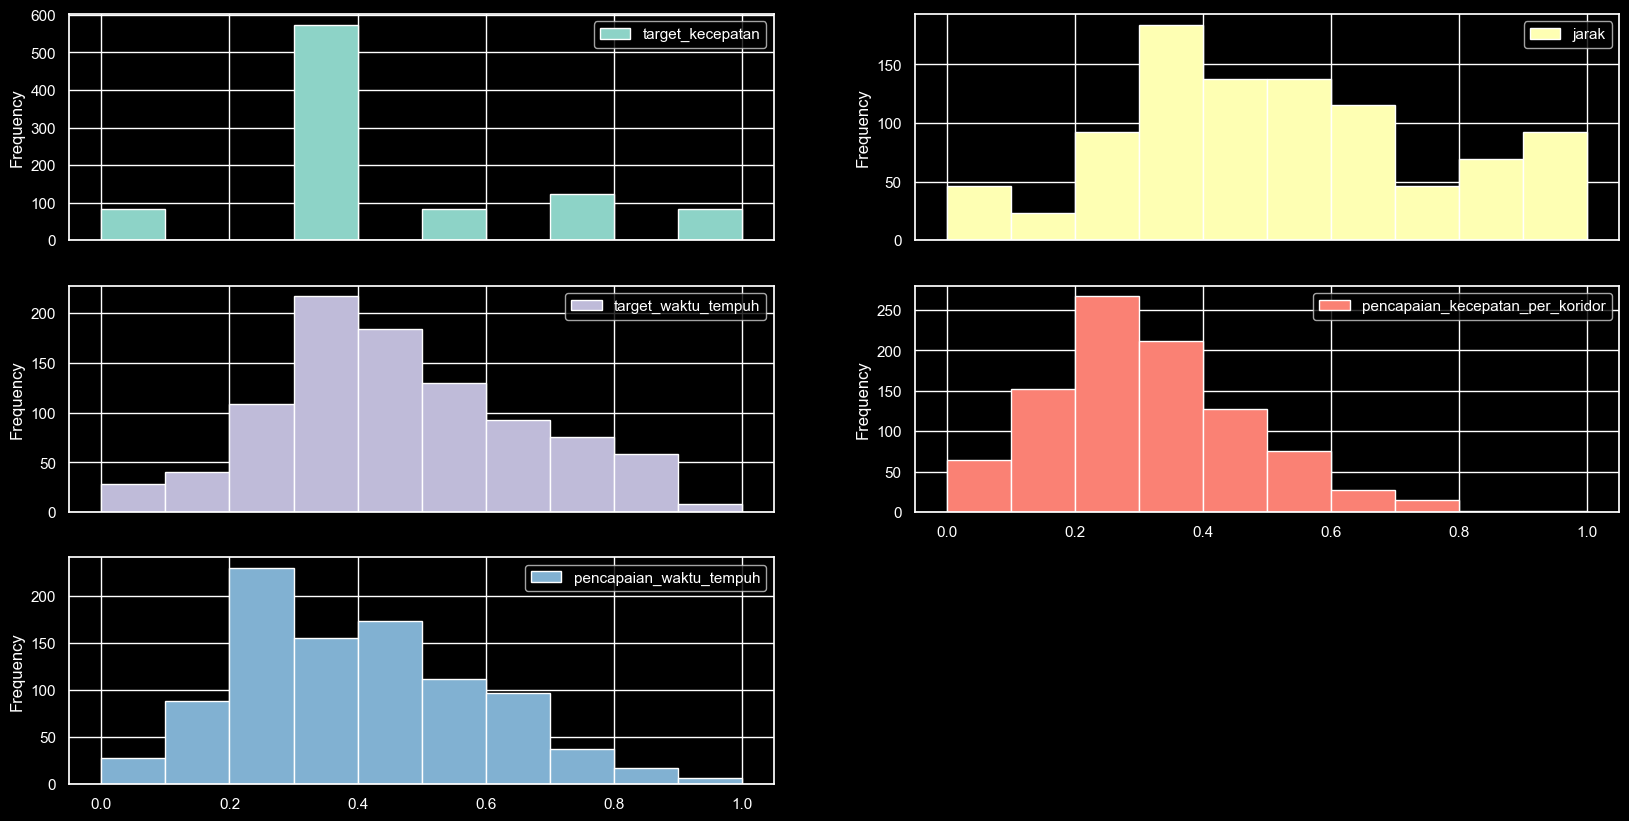

In [13]:
numericDfNormal.plot.hist(subplots=True, legend=True, layout=(3, 2))
plt.show()

### <p style="font-size:24px">Membuat DataFrame Numerik yang di Standarisasi</p>

In [14]:
scalerStd = StandardScaler()
numericDfStandard = pd.DataFrame(scalerStd.fit_transform(numericDf))
numericDfStandard.columns = numericDfCols
display(numericDfStandard)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,-0.232624,1.511478,1.513242,-0.575184,1.335042
1,-0.232624,-0.549380,-0.480680,-0.325759,-0.345691
2,-0.232624,-1.283520,-1.190646,0.675581,-1.179928
3,-0.232624,0.402038,0.439935,-0.019896,0.226555
4,-0.232624,0.276938,0.318449,0.409770,-0.311218
...,...,...,...,...,...
938,-0.232624,1.732049,1.726121,-0.709910,1.122077
939,-0.232624,-0.183956,-0.127369,-0.935667,0.330739
940,-0.232624,0.171591,0.217026,-1.460005,1.056962
941,-0.232624,0.790507,0.815537,-0.458665,0.860852


### Histogram Standarisasi 

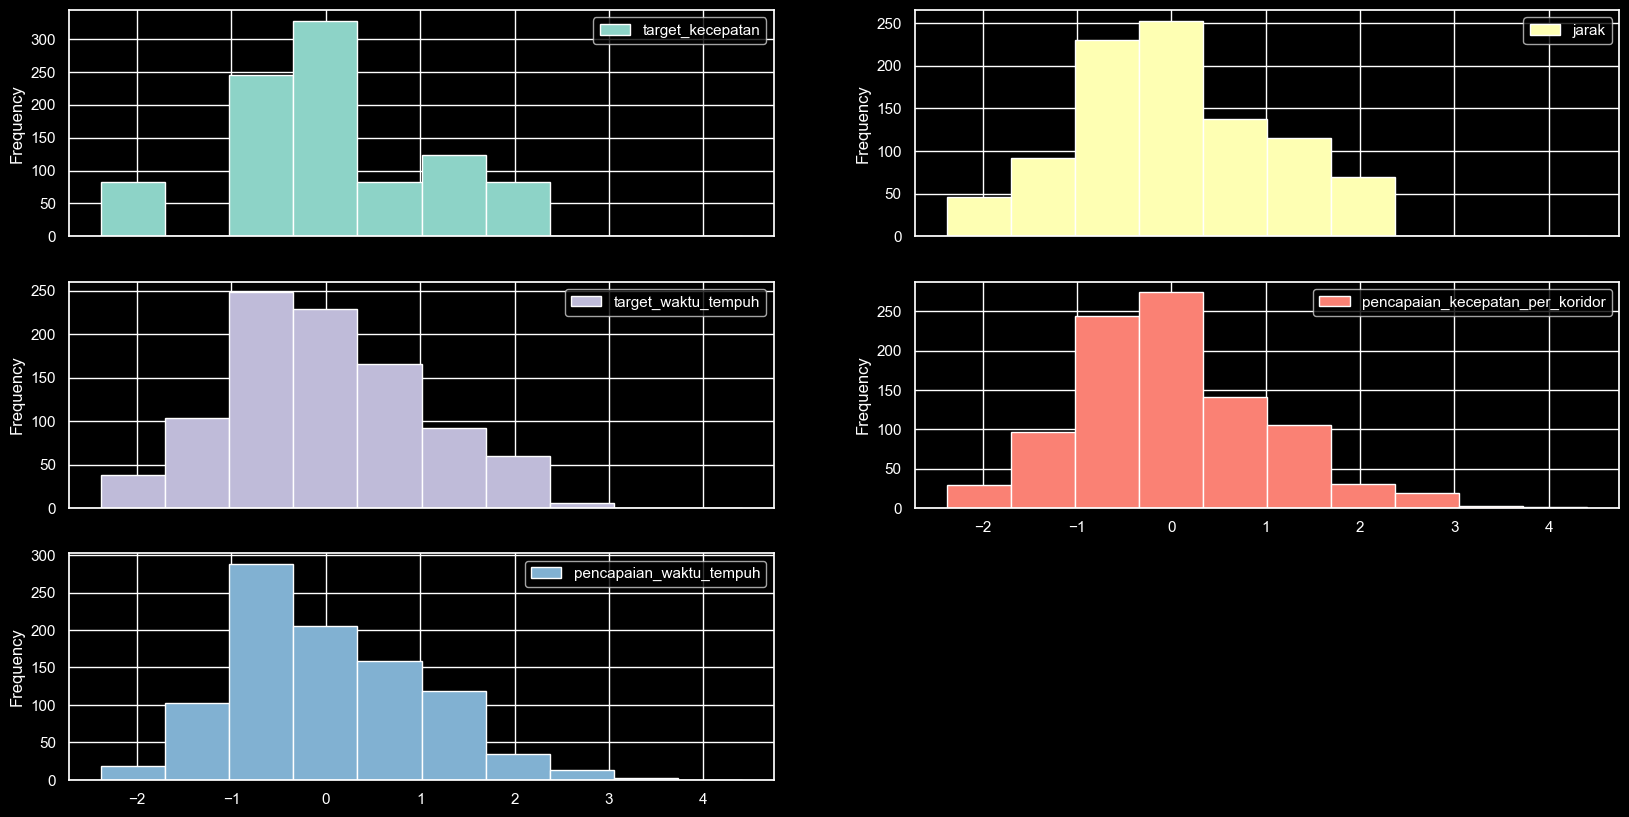

In [15]:
numericDfStandard.plot.hist(subplots=True, legend=True, layout=(3, 2))
plt.show()

### <p style="font-size:24px">Membuat DataFrame Numerik yang di Robust Scaler</p>

In [16]:
scalerRobust = RobustScaler()
numericDfRobust = pd.DataFrame(scalerRobust.fit_transform(numericDf))
numericDfRobust.columns = numericDfCols
display(numericDfRobust)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,0.0,1.262755,1.271339,-0.343593,0.994661
1,0.0,-0.334184,-0.336029,-0.147459,-0.176722
2,0.0,-0.903061,-0.908356,0.639943,-0.758142
3,0.0,0.403061,0.406110,0.093057,0.222104
4,0.0,0.306122,0.308176,0.430923,-0.152696
...,...,...,...,...,...
938,0.0,1.433673,1.442947,-0.449535,0.846236
939,0.0,-0.051020,-0.051213,-0.627058,0.294714
940,0.0,0.224490,0.226415,-1.039370,0.800854
941,0.0,0.704082,0.708895,-0.251969,0.664175


### Histogram Robust 

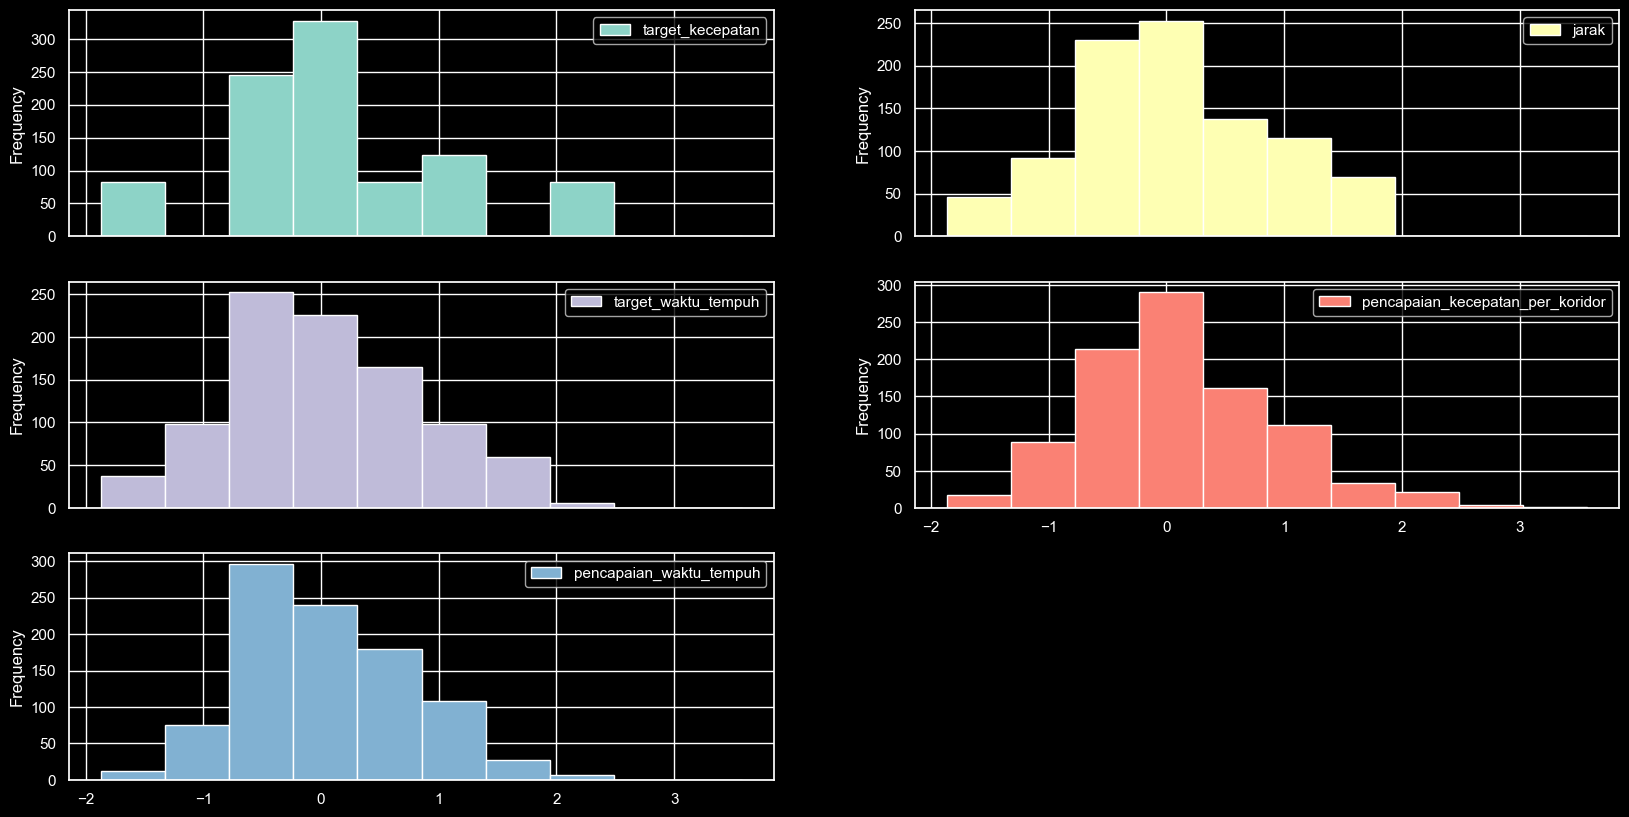

In [17]:
numericDfRobust.plot.hist(subplots=True, legend=True, layout=(3, 2))
plt.show()

## Akurasi Model Setiap Metode Transformasi

In [18]:
def appendOutputCol(dataframe,outputCol):
    outputCol = pd.DataFrame(outputCol)
    outputCol.reset_index(inplace=True)
    outputCol = outputCol.iloc[:,1:]
    if 'pencapaian_kecepatan' not in dataframe.columns: dataframe = pd.concat([dataframe,outputCol],axis=1)
    return dataframe

### Akurasi Normalisasi

In [19]:
numericDfNormal = appendOutputCol(numericDfNormal,outputCol)
display(numericDfNormal)
meanMaeNormal,stdMaeNormal,maeNormal = crossValMAE(model,numericDfNormal)
displayCrossValResults(meanMaeNormal,stdMaeNormal,maeNormal,'normalization')
appendAccuracy(meanMaeNormal,stdMaeNormal,maeNormal)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,0.4,0.875392,0.761832,0.226399,0.651410,24.36
1,0.4,0.384796,0.371647,0.265122,0.335636,24.36
2,0.4,0.210031,0.232715,0.420577,0.178900,24.36
3,0.4,0.611285,0.551799,0.312606,0.443149,24.36
4,0.4,0.581505,0.528026,0.379310,0.342113,24.36
...,...,...,...,...,...,...
938,0.4,0.927900,0.803490,0.205483,0.611399,23.02
939,0.4,0.471787,0.440785,0.170435,0.462723,21.11
940,0.4,0.556426,0.508179,0.089033,0.599165,21.11
941,0.4,0.703762,0.625300,0.244488,0.562320,21.11


Cross Val MAE Mean after normalization = 2.021
Cross Val MAE Std after normalization = 0.147
Non Cross Val MAE after normalization = 2.064


### Akurasi Standarisasi

In [20]:
numericDfStandard = appendOutputCol(numericDfStandard,outputCol)
display(numericDfStandard)
meanMaeStandard,stdMaeStandard,maeStandard = crossValMAE(model,numericDfStandard)
displayCrossValResults(meanMaeStandard,stdMaeStandard,maeStandard,'standarization')
appendAccuracy(meanMaeStandard,stdMaeStandard,maeStandard)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,-0.232624,1.511478,1.513242,-0.575184,1.335042,24.36
1,-0.232624,-0.549380,-0.480680,-0.325759,-0.345691,24.36
2,-0.232624,-1.283520,-1.190646,0.675581,-1.179928,24.36
3,-0.232624,0.402038,0.439935,-0.019896,0.226555,24.36
4,-0.232624,0.276938,0.318449,0.409770,-0.311218,24.36
...,...,...,...,...,...,...
938,-0.232624,1.732049,1.726121,-0.709910,1.122077,23.02
939,-0.232624,-0.183956,-0.127369,-0.935667,0.330739,21.11
940,-0.232624,0.171591,0.217026,-1.460005,1.056962,21.11
941,-0.232624,0.790507,0.815537,-0.458665,0.860852,21.11


Cross Val MAE Mean after standarization = 2.021
Cross Val MAE Std after standarization = 0.147
Non Cross Val MAE after standarization = 2.064


### Akurasi Robust Scaler

In [21]:
numericDfRobust = appendOutputCol(numericDfRobust,outputCol)
display(numericDfRobust)
meanMaeRobust,stdMaeRobust,maeRobust = crossValMAE(model,numericDfRobust)
displayCrossValResults(meanMaeRobust,stdMaeRobust,maeRobust,'robust')
appendAccuracy(meanMaeRobust,stdMaeRobust,maeRobust)

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,0.0,1.262755,1.271339,-0.343593,0.994661,24.36
1,0.0,-0.334184,-0.336029,-0.147459,-0.176722,24.36
2,0.0,-0.903061,-0.908356,0.639943,-0.758142,24.36
3,0.0,0.403061,0.406110,0.093057,0.222104,24.36
4,0.0,0.306122,0.308176,0.430923,-0.152696,24.36
...,...,...,...,...,...,...
938,0.0,1.433673,1.442947,-0.449535,0.846236,23.02
939,0.0,-0.051020,-0.051213,-0.627058,0.294714,21.11
940,0.0,0.224490,0.226415,-1.039370,0.800854,21.11
941,0.0,0.704082,0.708895,-0.251969,0.664175,21.11


Cross Val MAE Mean after robust = 2.021
Cross Val MAE Std after robust = 0.147
Non Cross Val MAE after robust = 2.064


## Tabel Akurasi

In [22]:
def makeTable(maeMeanAccuracy,maeStdAccuracy, nonCrossValAccuracy,transformations,title):
    comparisonTable = pt()
    comparisonTable.title = title
    comparisonTable.field_names = ["No","Metode Transformasi","Cross Val MAE Mean","Cross Val MAE Std","Non Cross Val MAE"]
    n = len(maeMeanAccuracy)
    for i in range(n): comparisonTable.add_row((i+1,transformations[i],maeMeanAccuracy[i],maeStdAccuracy[i],nonCrossValAccuracy[i]))
    return comparisonTable

In [23]:
transformations = ['Normalization','Standarization','Robust']
title = 'Tabel Komparasi Akurasi Normalisasi, Standarisasi, dan Robust'
tabel = makeTable(maeMeanAccuracy,maeStdAccuracy, nonCrossValAccuracy,transformations,title)
print(tabel)

+---------------------------------------------------------------------------------------+
|             Tabel Komparasi Akurasi Normalisasi, Standarisasi, dan Robust             |
+----+---------------------+--------------------+-------------------+-------------------+
| No | Metode Transformasi | Cross Val MAE Mean | Cross Val MAE Std | Non Cross Val MAE |
+----+---------------------+--------------------+-------------------+-------------------+
| 1  |    Normalization    |       2.021        |       0.147       |       2.064       |
| 2  |    Standarization   |       2.021        |       0.147       |       2.064       |
| 3  |        Robust       |       2.021        |       0.147       |       2.064       |
+----+---------------------+--------------------+-------------------+-------------------+


# Nomor 3

![](images/no3.png)

In [24]:
categoricalDfIndex = [i for i in range(len(df.dtypes)) if df.dtypes[i] == 'object']
categoricalDf = df.iloc[:,categoricalDfIndex]
categoricalDf['pencapaian_kecepatan'] = df['pencapaian_kecepatan']
display(categoricalDf)

,waktu,arah,koridor,pencapaian_kecepatan
0,Pagi,Selatan - Pusat,Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...,24.36
1,Pagi,Selatan - Pusat,Cilandak KKO - Warung Buncit - Mampang Prapata...,24.36
2,Pagi,Selatan - Pusat,Pangeran Antasari - Prapanca - Iskandarsyah - ...,24.36
3,Pagi,Selatan - Pusat,Pondok Labu - Fatmawati - Panglima Polim - Sis...,24.36
4,Pagi,Selatan - Pusat,Pasar Jumat - Metro Pondok Indah - Iskandar Mu...,24.36
...,...,...,...,...
77,Sore,Pusat - Utara,Letjend. Suprapto - Yos Sudarso - Bollevard Ba...,23.02
78,Sore,Pusat - Barat,Hayam Wuruk - Hasyim Ashari - Kyai Tapa - Daan...,21.11
79,Sore,Pusat - Barat,Hayam Wuruk - Balikpapan - Tomang Raya - S. Pa...,21.11
80,Sore,Pusat - Barat,Kebon Sirih - Jatibaru - Katamso - Kemanggisan...,21.11


## One Hot Encoder

In [25]:
def displayDfAfterOneHot(df):
    text = ' DataFrame After One Hot Encoding '
    print(f'{text:-^90}')
    display(df)

In [26]:
X,y = getDataset(categoricalDf)
oneHotEncoder = OneHotEncoder(sparse=False)
categoricalDfOneHotX = pd.DataFrame(oneHotEncoder.fit_transform(X))
y.reset_index(drop=True,inplace=True)
categoricalDfOneHot = pd.concat([categoricalDfOneHotX,y],axis=1)
display(categoricalDfOneHot)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,pencapaian_kecepatan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.36
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.36
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.36
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.36
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.02
939,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.11
940,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.11
941,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.11


## Akurasi Model

In [27]:
maeMeanAccuracyEncoding,maeStdAccuracyEncoding, nonCrossValAccuracyEncoding = [],[],[]
def appendAccuracyEncoding(maeMeanParam,maeStdParam,nonCrossValParam):
    maeMeanAccuracyEncoding.append(maeMeanParam)
    maeStdAccuracyEncoding.append(maeStdParam)
    nonCrossValAccuracyEncoding.append(nonCrossValParam)

### Akurasi Model setelah di One Hot Encoding (Categorical Data Only) 

In [28]:
meanMaeCategoryOneHot,stdMaeCategoryOneHot,maeCategoryOneHot = crossValMAE(model,categoricalDfOneHot)
appendAccuracyEncoding(meanMaeCategoryOneHot,stdMaeCategoryOneHot,maeCategoryOneHot)
displayCrossValResults(meanMaeCategoryOneHot,stdMaeCategoryOneHot,maeCategoryOneHot)

Cross Val MAE Mean = 3.147
Cross Val MAE Std = 0.204
Non Cross Val MAE = 3.307


## Ordinal Encoder

In [29]:
def displayDfAfterOrdinal(df):
    text = ' DataFrame After Ordinal Encoding '
    print(f'{text:-^90}')
    display(df)

In [30]:
X,y = getDataset(categoricalDf)
ordinalEncoder = OrdinalEncoder()
categoricalDfOrdinalX = pd.DataFrame(ordinalEncoder.fit_transform(X))
categoricalDfOrdinal = pd.concat([categoricalDfOrdinalX,y],axis=1)
displayDfAfterOrdinal(categoricalDfOrdinal)

---------------------------- DataFrame After Ordinal Encoding ----------------------------


,0,1,2,pencapaian_kecepatan
0,0.0,5.0,16.0,24.36
1,0.0,5.0,0.0,24.36
2,0.0,5.0,25.0,24.36
3,0.0,5.0,29.0,24.36
4,0.0,5.0,26.0,24.36
...,...,...,...,...
938,1.0,4.0,17.0,23.02
939,1.0,1.0,5.0,21.11
940,1.0,1.0,4.0,21.11
941,1.0,1.0,13.0,21.11


### Akurasi Model setelah di Ordinal Encoding (Categorical Data Only) 

In [31]:
meanMaeCategoryOrdinal,stdMaeCategoryOrdinal,maeCategoryOrdinal = crossValMAE(model,categoricalDfOrdinal)
appendAccuracyEncoding(meanMaeCategoryOrdinal,stdMaeCategoryOrdinal,maeCategoryOrdinal)
displayCrossValResults(meanMaeCategoryOrdinal,stdMaeCategoryOrdinal,maeCategoryOrdinal)

Cross Val MAE Mean = 3.181
Cross Val MAE Std = 0.183
Non Cross Val MAE = 3.246


## Tabel Perbandingan Akurasi Metode Encoding

In [32]:
transformations = ['One Hot','Ordinal']
title = 'Tabel Komparasi Akurasi One Hot Encoding Vs. Ordinal Encoding'
tabel = makeTable(maeMeanAccuracyEncoding,maeStdAccuracyEncoding,nonCrossValAccuracyEncoding,transformations,title)
print(tabel)

+---------------------------------------------------------------------------------------+
|             Tabel Komparasi Akurasi One Hot Encoding Vs. Ordinal Encoding             |
+----+---------------------+--------------------+-------------------+-------------------+
| No | Metode Transformasi | Cross Val MAE Mean | Cross Val MAE Std | Non Cross Val MAE |
+----+---------------------+--------------------+-------------------+-------------------+
| 1  |       One Hot       |       3.147        |       0.204       |       3.307       |
| 2  |       Ordinal       |       3.181        |       0.183       |       3.246       |
+----+---------------------+--------------------+-------------------+-------------------+


# Nomor 4

![](images/no4.png)

In [33]:
maeMeanAccuracyAll,maeStdAccuracyAll, nonCrossValAccuracyAll = [],[],[]
def appendAccuracyAll(maeMeanParam,maeStdParam,nonCrossValParam):
    maeMeanAccuracyAll.append(maeMeanParam)
    maeStdAccuracyAll.append(maeStdParam)
    nonCrossValAccuracyAll.append(nonCrossValParam)

## Normalisasi + One Hot Encoding

In [34]:
numericDfNormal.drop(['pencapaian_kecepatan'],axis=1,inplace=True)
normalOneHot = pd.concat([categoricalDfOneHot,numericDfNormal],axis=1)
display(normalOneHot)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,pencapaian_kecepatan,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,0.4,0.875392,0.761832,0.226399,0.651410
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,0.4,0.384796,0.371647,0.265122,0.335636
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,0.4,0.210031,0.232715,0.420577,0.178900
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,0.4,0.611285,0.551799,0.312606,0.443149
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,0.4,0.581505,0.528026,0.379310,0.342113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.02,0.4,0.927900,0.803490,0.205483,0.611399
939,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,0.4,0.471787,0.440785,0.170435,0.462723
940,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,0.4,0.556426,0.508179,0.089033,0.599165
941,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,0.4,0.703762,0.625300,0.244488,0.562320


### Akurasi Normalisasi + One Hot Encoding

In [35]:
maeMeanNormalOneHot,maeStdNormalOneHot,maeNormalOneHot = crossValMAE(model,normalOneHot)
appendAccuracyAll(maeMeanNormalOneHot,maeStdNormalOneHot,maeNormalOneHot)
displayCrossValResults(maeMeanNormalOneHot,maeStdNormalOneHot,maeNormalOneHot)

Cross Val MAE Mean = 1.322
Cross Val MAE Std = 0.136
Non Cross Val MAE = 1.332


## Normalisasi + Ordinal Encoding

In [36]:
normalOrdinal = pd.concat([categoricalDfOrdinal,numericDfNormal],axis=1)
display(normalOrdinal)

,0,1,2,pencapaian_kecepatan,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,0.0,5.0,16.0,24.36,0.4,0.875392,0.761832,0.226399,0.651410
1,0.0,5.0,0.0,24.36,0.4,0.384796,0.371647,0.265122,0.335636
2,0.0,5.0,25.0,24.36,0.4,0.210031,0.232715,0.420577,0.178900
3,0.0,5.0,29.0,24.36,0.4,0.611285,0.551799,0.312606,0.443149
4,0.0,5.0,26.0,24.36,0.4,0.581505,0.528026,0.379310,0.342113
...,...,...,...,...,...,...,...,...,...
938,1.0,4.0,17.0,23.02,0.4,0.927900,0.803490,0.205483,0.611399
939,1.0,1.0,5.0,21.11,0.4,0.471787,0.440785,0.170435,0.462723
940,1.0,1.0,4.0,21.11,0.4,0.556426,0.508179,0.089033,0.599165
941,1.0,1.0,13.0,21.11,0.4,0.703762,0.625300,0.244488,0.562320


### Akurasi Normalisasi + Ordinal Encoding

In [37]:
maeMeanNormalOrdinal,maeStdNormalOrdinal,maeNormalOrdinal = crossValMAE(model,normalOrdinal)
appendAccuracyAll(maeMeanNormalOrdinal,maeStdNormalOrdinal,maeNormalOrdinal)
displayCrossValResults(maeMeanNormalOrdinal,maeStdNormalOrdinal,maeNormalOrdinal)

Cross Val MAE Mean = 1.901
Cross Val MAE Std = 0.154
Non Cross Val MAE = 1.82


## Standarisasi + One Hot Encoding

In [38]:
numericDfStandard.drop(['pencapaian_kecepatan'],axis=1,inplace=True)
standardOneHot = pd.concat([categoricalDfOneHot,numericDfStandard],axis=1)
display(standardOneHot)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,pencapaian_kecepatan,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,-0.232624,1.511478,1.513242,-0.575184,1.335042
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,-0.232624,-0.549380,-0.480680,-0.325759,-0.345691
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,-0.232624,-1.283520,-1.190646,0.675581,-1.179928
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,-0.232624,0.402038,0.439935,-0.019896,0.226555
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,-0.232624,0.276938,0.318449,0.409770,-0.311218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.02,-0.232624,1.732049,1.726121,-0.709910,1.122077
939,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,-0.232624,-0.183956,-0.127369,-0.935667,0.330739
940,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,-0.232624,0.171591,0.217026,-1.460005,1.056962
941,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,-0.232624,0.790507,0.815537,-0.458665,0.860852


### Akurasi Standarisasi + One Hot Encoding

In [39]:
maeMeanStandardOneHot,maeStdStandardOneHot,maeStandardOneHot = crossValMAE(model,standardOneHot)
appendAccuracyAll(maeMeanStandardOneHot,maeStdStandardOneHot,maeStandardOneHot)
displayCrossValResults(maeMeanStandardOneHot,maeStdStandardOneHot,maeStandardOneHot)

Cross Val MAE Mean = 1.31
Cross Val MAE Std = 0.129
Non Cross Val MAE = 1.354


## Standarisasi + Ordinal Encoding

In [40]:
standardOrdinal = pd.concat([categoricalDfOrdinal,numericDfStandard],axis=1)
display(standardOrdinal)

,0,1,2,pencapaian_kecepatan,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,0.0,5.0,16.0,24.36,-0.232624,1.511478,1.513242,-0.575184,1.335042
1,0.0,5.0,0.0,24.36,-0.232624,-0.549380,-0.480680,-0.325759,-0.345691
2,0.0,5.0,25.0,24.36,-0.232624,-1.283520,-1.190646,0.675581,-1.179928
3,0.0,5.0,29.0,24.36,-0.232624,0.402038,0.439935,-0.019896,0.226555
4,0.0,5.0,26.0,24.36,-0.232624,0.276938,0.318449,0.409770,-0.311218
...,...,...,...,...,...,...,...,...,...
938,1.0,4.0,17.0,23.02,-0.232624,1.732049,1.726121,-0.709910,1.122077
939,1.0,1.0,5.0,21.11,-0.232624,-0.183956,-0.127369,-0.935667,0.330739
940,1.0,1.0,4.0,21.11,-0.232624,0.171591,0.217026,-1.460005,1.056962
941,1.0,1.0,13.0,21.11,-0.232624,0.790507,0.815537,-0.458665,0.860852


### Akurasi Standarisasi + Ordinal Encoding

In [41]:
maeMeanStandardOrdinal,maeStdStandardOrdinal,maeStandardOrdinal = crossValMAE(model,standardOrdinal)
appendAccuracyAll(maeMeanStandardOrdinal,maeStdStandardOrdinal,maeStandardOrdinal)
displayCrossValResults(maeMeanStandardOrdinal,maeStdStandardOrdinal,maeStandardOrdinal)

Cross Val MAE Mean = 1.901
Cross Val MAE Std = 0.154
Non Cross Val MAE = 1.82


## Robust Scaler + One Hot Encoding

In [42]:
numericDfRobust.drop(['pencapaian_kecepatan'],axis=1,inplace=True)
robustOneHot = pd.concat([categoricalDfOneHot,numericDfRobust],axis=1)
display(robustOneHot)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,pencapaian_kecepatan,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,0.0,1.262755,1.271339,-0.343593,0.994661
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,0.0,-0.334184,-0.336029,-0.147459,-0.176722
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,0.0,-0.903061,-0.908356,0.639943,-0.758142
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,0.0,0.403061,0.406110,0.093057,0.222104
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.36,0.0,0.306122,0.308176,0.430923,-0.152696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.02,0.0,1.433673,1.442947,-0.449535,0.846236
939,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,0.0,-0.051020,-0.051213,-0.627058,0.294714
940,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,0.0,0.224490,0.226415,-1.039370,0.800854
941,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.11,0.0,0.704082,0.708895,-0.251969,0.664175


### Akurasi Robust + One Hot Encoding

In [43]:
maeMeanRobustOneHot,maeStdRobustOneHot,maeRobustOneHot = crossValMAE(model,robustOneHot)
appendAccuracyAll(maeMeanRobustOneHot,maeStdRobustOneHot,maeRobustOneHot)
displayCrossValResults(maeMeanRobustOneHot,maeStdRobustOneHot,maeRobustOneHot)

Cross Val MAE Mean = 1.313
Cross Val MAE Std = 0.128
Non Cross Val MAE = 1.369


## Robust Scaler + Ordinal Encoding

In [44]:
robustOrdinal = pd.concat([categoricalDfOrdinal,numericDfRobust],axis=1)
display(robustOrdinal)

,0,1,2,pencapaian_kecepatan,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,0.0,5.0,16.0,24.36,0.0,1.262755,1.271339,-0.343593,0.994661
1,0.0,5.0,0.0,24.36,0.0,-0.334184,-0.336029,-0.147459,-0.176722
2,0.0,5.0,25.0,24.36,0.0,-0.903061,-0.908356,0.639943,-0.758142
3,0.0,5.0,29.0,24.36,0.0,0.403061,0.406110,0.093057,0.222104
4,0.0,5.0,26.0,24.36,0.0,0.306122,0.308176,0.430923,-0.152696
...,...,...,...,...,...,...,...,...,...
938,1.0,4.0,17.0,23.02,0.0,1.433673,1.442947,-0.449535,0.846236
939,1.0,1.0,5.0,21.11,0.0,-0.051020,-0.051213,-0.627058,0.294714
940,1.0,1.0,4.0,21.11,0.0,0.224490,0.226415,-1.039370,0.800854
941,1.0,1.0,13.0,21.11,0.0,0.704082,0.708895,-0.251969,0.664175


### Akurasi Robust + Ordinal Encoding

In [45]:
maeMeanRobustOrdinal,maeStdRobustOrdinal,maeRobustOrdinal = crossValMAE(model,robustOrdinal)
appendAccuracyAll(maeMeanRobustOrdinal,maeStdRobustOrdinal,maeRobustOrdinal)
displayCrossValResults(maeMeanRobustOrdinal,maeStdRobustOrdinal,maeRobustOrdinal)

Cross Val MAE Mean = 1.901
Cross Val MAE Std = 0.154
Non Cross Val MAE = 1.82


# Nomor 5 Perbandingan Akurasi MAE

![](images/no5.png)

In [46]:
transformations = ['Normalisasi + One Hot Encoding ','Normalisasi + Ordinal Encoding','Standarisasi + One Hot Encoding ','Standarisasi + Ordinal Encoding','Robust + One Hot Encoding',
'Robust + Ordinal Encoding']
title = 'Tabel Komparasi Akurasi Gabungan'
tabel = makeTable(maeMeanAccuracyAll,maeStdAccuracyAll, nonCrossValAccuracyAll,transformations,title)
print(tabel)

+----------------------------------------------------------------------------------------------------+
|                                  Tabel Komparasi Akurasi Gabungan                                  |
+----+----------------------------------+--------------------+-------------------+-------------------+
| No |       Metode Transformasi        | Cross Val MAE Mean | Cross Val MAE Std | Non Cross Val MAE |
+----+----------------------------------+--------------------+-------------------+-------------------+
| 1  | Normalisasi + One Hot Encoding   |       1.322        |       0.136       |       1.332       |
| 2  |  Normalisasi + Ordinal Encoding  |       1.901        |       0.154       |        1.82       |
| 3  | Standarisasi + One Hot Encoding  |        1.31        |       0.129       |       1.354       |
| 4  | Standarisasi + Ordinal Encoding  |       1.901        |       0.154       |        1.82       |
| 5  |    Robust + One Hot Encoding     |       1.313        |       0.12